In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", context="talk")

from sklearn.manifold import TSNE
pd.set_option('display.max_columns', 500)

In [55]:
df = pd.read_csv('acs2017_census_tract_data.csv')

In [56]:
colorado = df.loc[df['State']== 'Colorado'].drop(columns=['State'], axis=1)

In [57]:
colorado.head()

,TractId,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
11617,8001007801,Adams County,4412,2204,2208,44.5,11.1,15.1,0.0,25.2,0.0,1361,24420.0,4644.0,12138.0,1887.0,44.1,56.0,3.1,38.5,15.8,21.9,20.7,43.0,24.0,20.0,8.1,2.7,2.2,28.4,1861,91.9,3.3,4.8,0.0,9.8
11618,8001007802,Adams County,4594,2095,2499,58.5,11.0,19.2,1.4,5.6,0.0,1487,28341.0,5089.0,11595.0,1427.0,37.2,48.8,4.6,36.6,12.6,30.9,15.3,55.2,19.7,21.2,2.2,0.8,1.0,29.2,1862,90.4,4.4,4.6,0.5,12.0
11619,8001007900,Adams County,5589,2919,2670,57.8,19.8,13.7,1.7,2.4,0.0,2537,38297.0,3424.0,16182.0,1657.0,23.6,34.6,13.6,26.4,19.6,24.5,15.8,66.9,17.1,9.5,2.9,1.3,2.3,29.4,2690,90.9,4.6,4.2,0.3,7.7
11620,8001008000,Adams County,6412,3295,3117,54.7,24.8,14.9,0.9,3.1,0.0,3120,52219.0,3066.0,20396.0,3851.0,18.5,23.6,14.6,30.8,22.0,15.7,16.8,65.1,20.0,9.8,1.0,1.4,2.6,33.5,3057,89.0,9.2,1.8,0.0,6.5
11621,8001008100,Adams County,1563,715,848,22.6,60.7,2.5,0.0,8.2,0.0,1273,39156.0,6527.0,28549.0,3309.0,31.1,19.4,55.5,8.3,15.2,16.1,4.9,51.9,15.7,1.5,23.0,3.0,5.0,20.6,735,75.9,19.5,4.6,0.0,2.1


In [8]:
colorado.columns

Index(['TractId', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [14]:
#Dropping some columns
#Use poverty instead of child poverty
# drop TractId	 and county so the data can be more general
# drop employed and use unemployment instead
drop_cols_for_analysis = ['ChildPoverty','TractId','County','Income','IncomeErr','IncomePerCapErr', 'Employed']
co_dropped = colorado.drop(columns=drop_cols_for_analysis, axis=1)

In [16]:
co_dropped.isnull().sum()*100/co_dropped.isnull().count()

TotalPop            0.000000
Men                 0.000000
Women               0.000000
Hispanic            0.560448
White               0.560448
Black               0.560448
Native              0.560448
Asian               0.560448
Pacific             0.560448
VotingAgeCitizen    0.000000
IncomePerCap        0.560448
Poverty             1.040833
Professional        0.960769
Service             0.960769
Office              0.960769
Construction        0.960769
Production          0.960769
Drive               0.960769
Carpool             0.960769
Transit             0.960769
Walk                0.960769
OtherTransp         0.960769
WorkAtHome          0.960769
MeanCommute         1.040833
PrivateWork         0.960769
PublicWork          0.960769
SelfEmployed        0.960769
FamilyWork          0.960769
Unemployment        0.960769
dtype: float64

In [17]:
#Drop rows that has nulls since the nulls are one percent or lower. 
co_clean = co_dropped.dropna()

In [18]:
co_clean.shape

(1234, 29)

In [19]:
tx_dropped.shape

(1249, 29)

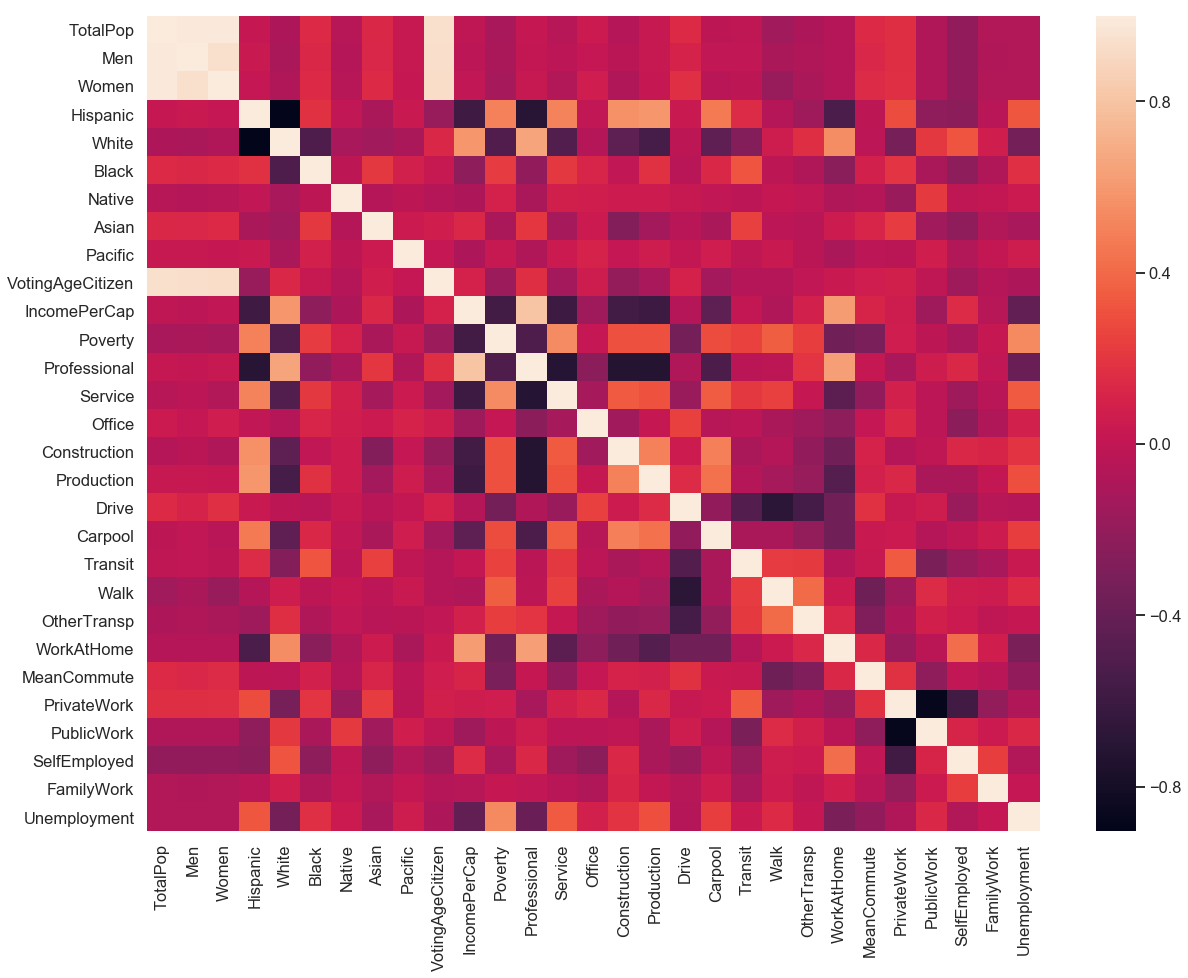

In [23]:
# Correlation heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
corr = co_clean.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,)

In [25]:
co_clean.corr().unstack().sort_values(ascending=False).drop_duplicates()

Unemployment      Unemployment        1.000000
TotalPop          Men                 0.986987
                  Women               0.986699
Women             Men                 0.947720
TotalPop          VotingAgeCitizen    0.942332
VotingAgeCitizen  Men                 0.933733
Women             VotingAgeCitizen    0.926094
IncomePerCap      Professional        0.800499
Professional      White               0.652149
                  WorkAtHome          0.622649
IncomePerCap      WorkAtHome          0.615145
Production        Hispanic            0.587658
White             IncomePerCap        0.584173
Hispanic          Construction        0.562761
WorkAtHome        White               0.548174
Service           Poverty             0.544672
Unemployment      Poverty             0.537699
Hispanic          Service             0.505259
Poverty           Hispanic            0.501506
Production        Construction        0.497749
Carpool           Construction        0.487523
Hispanic     

In [27]:
columns = list(co_clean.columns)
columns

['TotalPop',
 'Men',
 'Women',
 'Hispanic',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific',
 'VotingAgeCitizen',
 'IncomePerCap',
 'Poverty',
 'Professional',
 'Service',
 'Office',
 'Construction',
 'Production',
 'Drive',
 'Carpool',
 'Transit',
 'Walk',
 'OtherTransp',
 'WorkAtHome',
 'MeanCommute',
 'PrivateWork',
 'PublicWork',
 'SelfEmployed',
 'FamilyWork',
 'Unemployment']

In [30]:
ethnicity = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
ethnicity

['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

Text(0.5, 1.0, 'Ethnicity in Colorado')

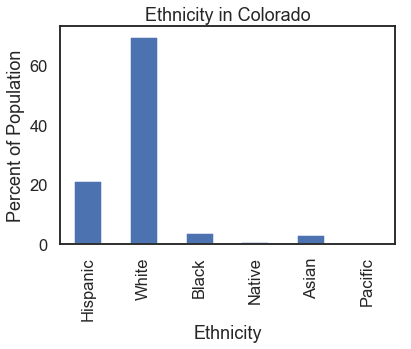

In [32]:
race_plot = co_clean[ethnicity].mean().plot(kind="bar")
plt.ylabel('Percent of Population')
plt.xlabel('Ethnicity')
plt.title('Ethnicity in Colorado')

In [36]:
co_clean.describe()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,...,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.00000,1234.000000,1234.000000,1234.000000
mean,4390.321718,2200.665316,2189.656402,21.080632,69.531929,3.438574,0.574554,2.780713,0.128120,3140.559968,...,3.045543,2.912156,2.269125,7.388493,24.856321,79.133063,13.98201,6.682334,0.200000,5.486629
std,2000.920335,1019.317645,1008.277921,17.824638,20.235153,5.987042,2.654861,3.324924,0.588656,1389.656682,...,3.696181,4.804880,2.936886,4.693741,5.788053,7.775191,6.40522,3.619750,0.480436,3.400893
min,286.000000,177.000000,109.000000,0.200000,8.800000,0.000000,0.000000,0.000000,0.000000,238.000000,...,0.000000,0.000000,0.000000,0.000000,6.200000,35.800000,1.40000,0.000000,0.000000,0.000000
25%,3009.250000,1479.750000,1499.000000,8.325000,59.800000,0.300000,0.000000,0.500000,0.000000,2148.000000,...,0.300000,0.500000,0.600000,3.800000,21.025000,75.625000,9.90000,4.300000,0.000000,3.200000
50%,4182.500000,2080.000000,2070.000000,14.500000,75.700000,1.100000,0.200000,1.700000,0.000000,2971.000000,...,1.900000,1.400000,1.400000,6.500000,24.800000,80.200000,13.10000,6.000000,0.000000,4.800000
75%,5503.750000,2755.000000,2740.250000,28.675000,84.775000,3.500000,0.600000,3.875000,0.000000,3949.000000,...,4.600000,3.375000,2.700000,10.300000,28.500000,84.475000,16.90000,8.275000,0.300000,7.000000
max,15869.000000,7692.000000,8177.000000,85.400000,99.100000,47.600000,84.600000,27.600000,11.500000,11914.000000,...,28.200000,51.300000,26.000000,31.300000,50.000000,96.800000,59.90000,24.800000,5.400000,35.100000


In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [38]:
# declare features
X = co_clean
# # normalize them
# X_norm = normalize(X)

# use min max scaler instead of normalize
scaler = MinMaxScaler(feature_range=[0, 1])
X_scaled = scaler.fit_transform(X)

C:\Users\ninja\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


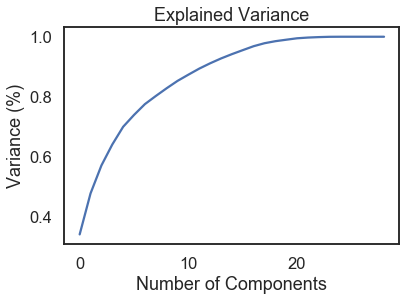

In [39]:

#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_scaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [40]:
# select amount of components to keep
X_pca = PCA(20).fit_transform(X_scaled)

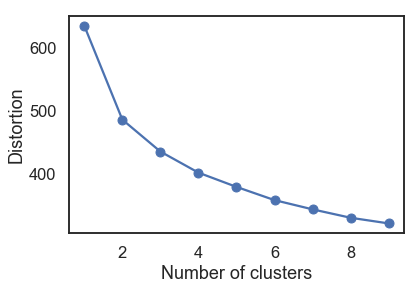

In [41]:

# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 10):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_pca)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [42]:
## create k means object
km = KMeans(
        n_clusters=3, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
## fit the model
model = km.fit(X_pca)

In [43]:
## get cluster labels for each row
cluster_labels = model.labels_

In [44]:
co_clean['Cluster Label'] = cluster_labels

C:\Users\ninja\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
## seperate by cluster
cluster_zero = co_clean.loc[co_clean['Cluster Label'] == 0]
cluster_one = co_clean.loc[co_clean['Cluster Label'] == 1]
cluster_two = co_clean.loc[co_clean['Cluster Label'] == 2]

In [48]:
cluster_zero.shape

(519, 30)

In [49]:
cluster_one.shape

(462, 30)

In [50]:
cluster_two.shape

(253, 30)

In [52]:
# group by cluster and take the mean for each column
co_grouped = co_clean.groupby(['Cluster Label']).mean()

In [58]:
co_grouped.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,IncomePerCap,Poverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
Cluster Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4015.707129,2018.389210,1997.317919,17.669942,74.397688,2.582081,0.819846,1.888439,0.154913,3000.489403,30194.263969,12.201541,35.829865,18.866859,23.699807,11.524663,10.085934,76.742582,9.500385,2.132755,3.255684,2.175723,6.194798,24.049326,75.991329,16.276108,7.484971,0.247784,5.708092
1,4720.396104,2356.813853,2363.582251,9.115801,81.904545,2.275974,0.288528,3.845022,0.066667,3526.218615,48121.019481,7.114286,54.840693,12.841558,22.048052,4.930087,5.338745,73.339394,6.729221,3.273593,2.888312,2.842857,10.933117,25.501082,79.852814,13.291126,6.682251,0.167749,4.020996
2,4556.055336,2289.442688,2266.612648,49.926087,36.956917,7.318577,0.593676,2.667589,0.185375,2723.652174,20977.490119,21.277075,22.904743,24.201976,23.068775,15.190514,14.635968,74.586166,13.879051,4.501581,2.250988,1.413043,3.364427,25.334387,84.263636,10.537549,5.035968,0.160870,7.708696
